 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [2]:
# Before we begin ...
# read all required .csv files
whale_path = Path("./Resources/whale_returns.csv")
algo_path = Path("./Resources/algo_returns.csv")
sp60_path = Path("./Resources/sp_tsx_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading "whale" data into DataFrame
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Reading whale returns ... top 5
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Reading whale returns ... bottom 5
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [6]:
# Reading whale returns ... sample of 7
whale_returns.sample(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-11-06,0.005543,-0.000919,0.001778,0.014818
2016-12-12,-0.007064,0.001338,0.001946,-0.011927
2015-11-03,0.005853,0.002269,0.007130,0.014331
2016-02-22,0.017129,0.011409,0.002889,0.020310
2015-03-05,0.004016,0.004076,0.002355,0.006726
2019-03-25,-0.003330,-0.000420,0.000972,0.010737
2015-06-04,-0.005806,-0.004054,-0.009548,-0.009874


In [7]:
# Reading whale returns ... get a feel for the data
whale_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [8]:
# Count nulls
whale_returns.isna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [9]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [10]:
# Sort by Date
whale_returns.sort_index(inplace=True)
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [11]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# 6 dodgy values found ...
# ... drop 'em
algo_returns.dropna(inplace=True)

# Check again for fun
algo_returns.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
# Sort by Date
algo_returns.sort_index(inplace=True)
algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices
sp60_close = pd.read_csv(sp60_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp60_close.sample(5)

,Close
Date,
2015-06-29,"$14,490.15"
2013-08-30,"$12,653.90"
2013-11-29,"$13,395.40"
2015-01-12,"$14,265.01"
2014-02-28,"$14,209.59"


In [16]:
# Describe the data
sp60_close.describe()

,Close
count,1818
unique,1814
top,"$16,371.55"
freq,2


In [17]:
# Check Data Types
sp60_close.dtypes

Close    object
dtype: object

In [18]:
# The data type is not as it should 
# be for the column labelled "Close"
# We need to dig a little deeper
# with the "Close" column
sp60_close["Close"].value_counts()

$16,371.55    2
$14,533.57    2
$15,657.63    2
$16,074.30    2
$12,674.37    1
             ..
$13,710.31    1
$16,537.34    1
$16,114.03    1
$16,318.14    1
$13,024.30    1
Name: Close, Length: 1814, dtype: int64

In [19]:
# Okay, looks alright, although obvious there are duplicates
# as well as there being characters within what is expected
# to be pricing/numerical data.
#
# Duplicates are not an issue, as it is entirely possible
# that a closing price can be repeated over time
sp60_close.loc[sp60_close["Close"] == "$15,657.63"]

,Close
Date,
2014-09-03,"$15,657.63"
2017-03-29,"$15,657.63"


In [20]:
# Remove the dodgy alphanumeric characters (except '.')
# and convert into correct pricing data
sp60_close["Close"] = sp60_close["Close"].str.replace('[^.\w]',"").astype('float')

In [21]:
# Check that it is all good
sp60_close.sample(5)

,Close
Date,
2017-11-29,15967.72
2015-06-12,14741.15
2016-11-25,15075.44
2018-12-18,14416.89
2016-05-09,13563.84


In [22]:
# Calculate Daily Returns
# ... and store in a new "returns" DataFrame
sp60_returns = sp60_close.pct_change()
sp60_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [23]:
# Drop nulls
sp60_returns.dropna(inplace=True)

In [24]:
# Sort by Date
sp60_returns.sort_index(inplace=True)
sp60_returns.tail()

,Close
Date,
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003
2019-12-27,-0.000695
2019-12-30,-0.004057


In [25]:
# Rename `Close` Column to be specific to this portfolio.
sp60_returns.rename(columns={'Close':'S&P TSX 60'}, inplace=True)
sp60_returns.sample(5)

,S&P TSX 60
Date,
2016-12-15,0.001390
2014-10-06,-0.003155
2015-03-09,-0.006555
2016-11-08,0.000300
2019-02-14,0.004432


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns,algo_returns,sp60_returns], axis='columns', join='inner')
all_returns.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2017-07-26,0.000403,0.001369,0.002047,0.009638,-0.005525,-0.000280,-0.002038
2018-06-22,0.003406,0.004966,0.006903,-0.001542,-0.003197,0.003373,0.007039
2018-06-07,-0.000923,0.009195,-0.002086,-0.013634,0.008275,-0.002455,0.000547
2016-04-19,0.003920,0.009116,0.001913,-0.036515,-0.009745,0.007299,0.010748
2017-12-29,0.002197,-0.000662,-0.002754,-0.001017,0.002356,-0.005479,-0.000790
2017-10-11,0.002238,0.000024,0.001239,-0.004142,-0.000572,0.001052,0.001905
2018-11-01,0.015545,0.022372,0.022348,0.020185,0.028359,0.019114,0.008176
2017-08-03,-0.003551,-0.023275,-0.004192,0.002081,0.000090,-0.004730,-0.004826
2018-11-19,-0.017277,-0.012187,-0.009246,-0.048750,-0.002182,-0.017076,-0.005575


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Portfolio Returns - 2015 to 2019\n'}, xlabel='Date'>

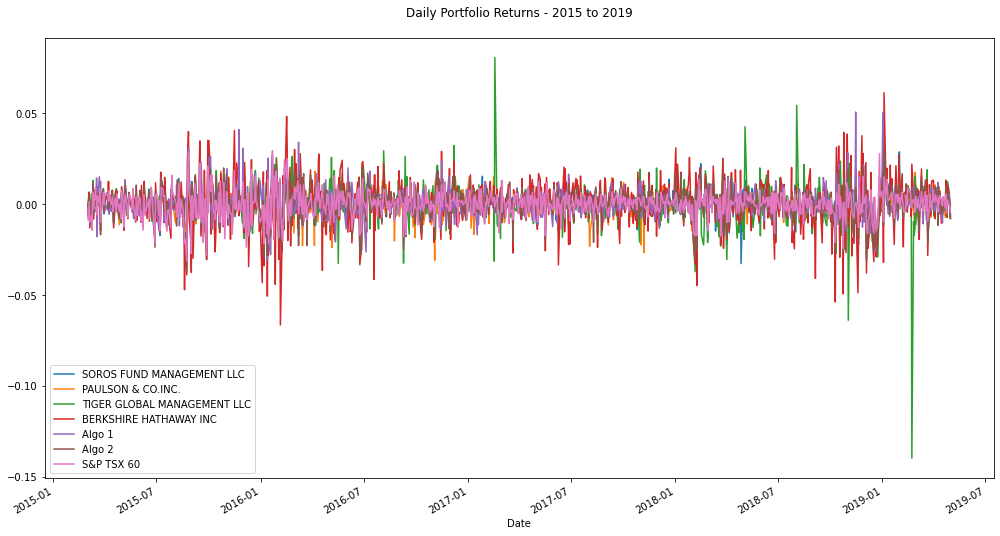

In [27]:
# Plot daily returns of all portfolios
# I like using \n as part of the chart/plot title (it creates space)
all_returns.plot(figsize=(17,9), title="Daily Portfolio Returns - 2015 to 2019\n")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Portfolio Returns (%) vs. S&P TSX 60 - 2015 to 2019\n'}, xlabel='Date'>

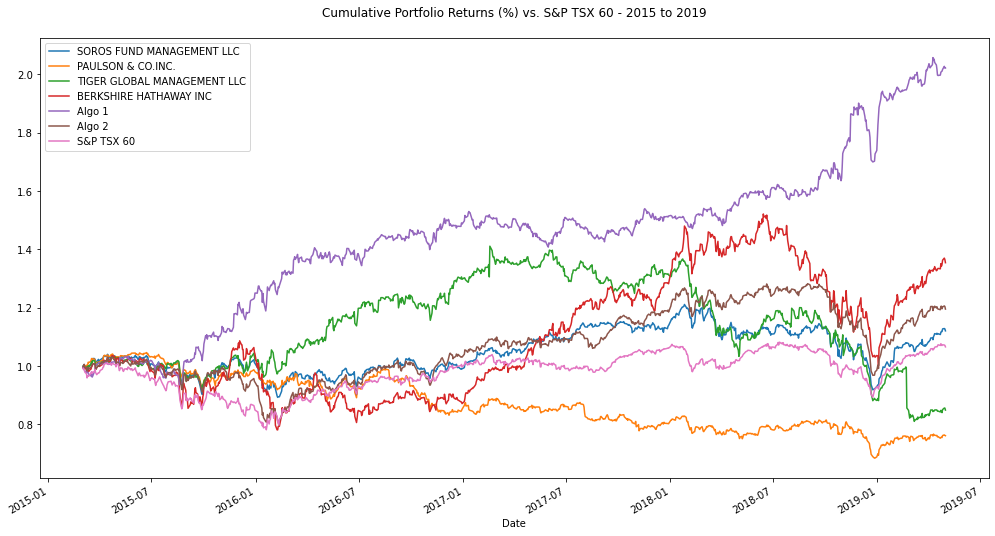

In [28]:
# Calculate cumulative returns of all portfolios
all_cumu_rets = (1 + all_returns).cumprod()

# Plot cumulative returns
all_cumu_rets.plot(figsize=(17,9), title="Cumulative Portfolio Returns (%) vs. S&P TSX 60 - 2015 to 2019\n")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Portfolio Returns (incl. S&P TSX 60)\n'}>

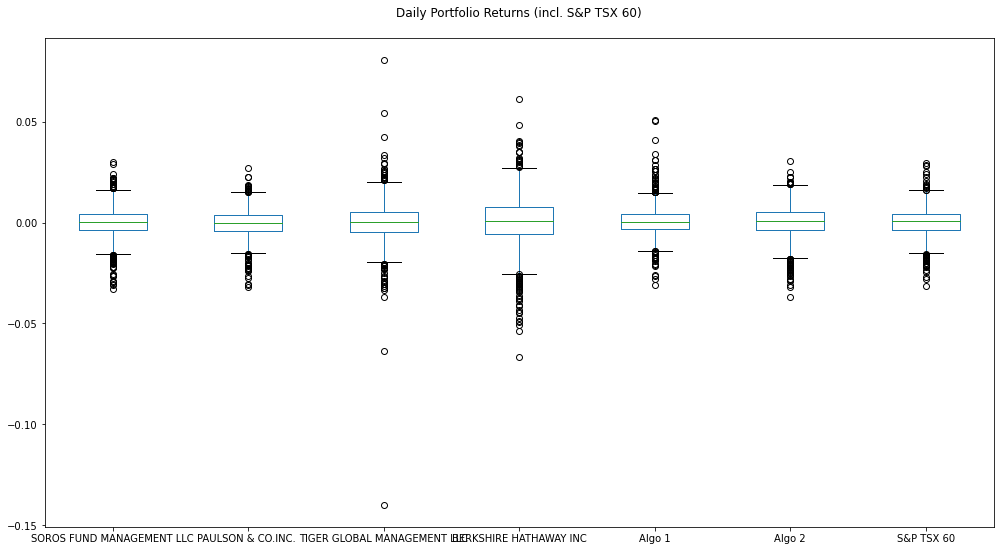

In [29]:
# Box plot to visually show risk
all_returns.plot(kind="box", figsize=(17,9), title="Daily Portfolio Returns (incl. S&P TSX 60)\n")

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
all_returns_std = all_returns.std()
all_returns_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
# Calculate  the daily standard deviation of S&P TSX 60
sp60_std = all_returns["S&P TSX 60"].std()

# Determine which portfolios are riskier than the S&P TSX 60
all_returns_std.loc[all_returns_std[:] > sp60_std]

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
all_returns.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day Rolling Standard Deviation - All Portfolios (incl. S&P TSX 60)\n'}, xlabel='Date'>

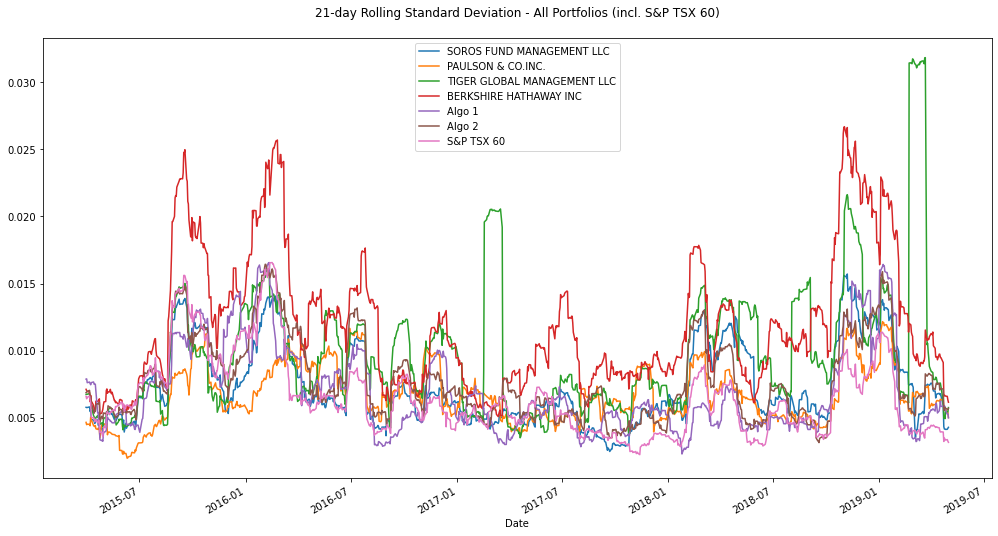

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rets_roll21_std = all_returns.rolling(window=21).std()
# Plot the rolling standard deviation
all_rets_roll21_std.plot(figsize=(17,9), title="21-day Rolling Standard Deviation - All Portfolios (incl. S&P TSX 60)\n")

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
all_ret_cor = all_returns.corr()

# Display de correlation matrix
# Display the matrix itself
all_ret_cor

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

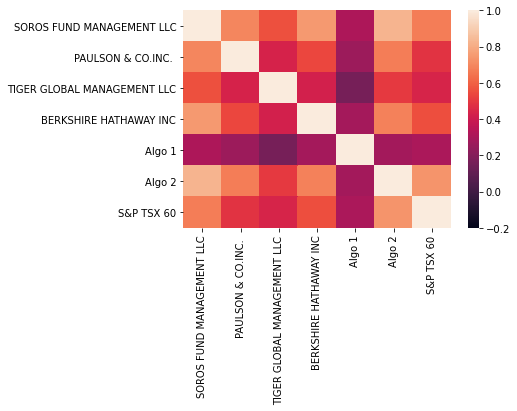

In [35]:
# Now display a heatmap of the correlation
# Bearkshire and Algo 2 pretty highly correlated with Soros
sns.heatmap(all_ret_cor,vmin=-0.2,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [36]:
# Calculate covariance of a single portfolio
# I'm choosing Algo 1 as it is the least correlated.
algo_sp60_cov = all_returns["Algo 1"].cov(all_returns["S&P TSX 60"])
algo_sp60_cov

1.6563000308911446e-05

In [37]:
# Calculate variance of S&P TSX
algo_sp60_var = all_returns["Algo 1"].var()
algo_sp60_var

5.759114513564972e-05

In [38]:
# Computing beta
algo_beta = algo_sp60_cov / algo_sp60_var
algo_beta

0.28759630095736227

Text(0, 0.5, 'Algo 1 Beta')

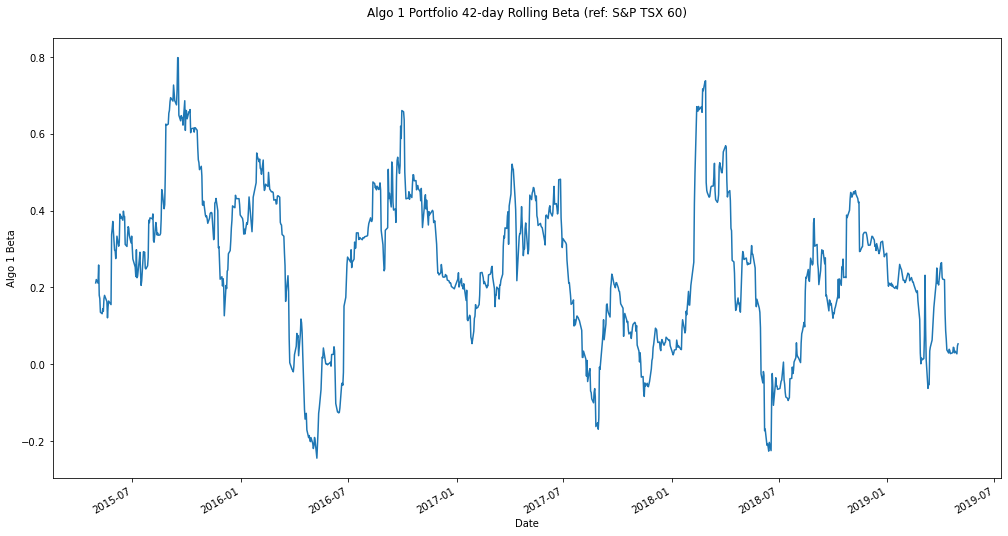

In [39]:
# Plot beta trend
# To plot the beta trend, I will need to create a trend
# To do so, I'll use a rolling window of 42 days for
# Algo 1 against S&P TSX 60
#
# Rolling Covariance
allret_roll_cov = all_returns["Algo 1"].rolling(window=42).cov(all_returns["S&P TSX 60"])

# Rolling Variance
allret_roll_var = all_returns["Algo 1"].rolling(window=42).var()

# Rolling Beta
allret_roll_beta = allret_roll_cov / allret_roll_var

# Plot the Beta Trend
allret_roll_beta.plot(figsize=(17,9), title="Algo 1 Portfolio 42-day Rolling Beta (ref: S&P TSX 60)\n").set_ylabel("Algo 1 Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

Text(0, 0.5, 'Algo 1 Beta')

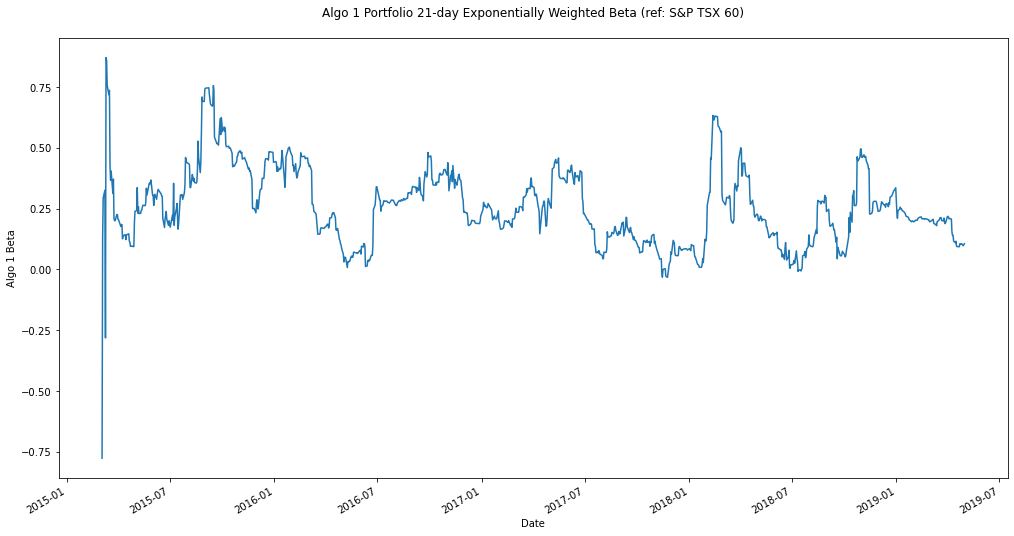

In [40]:
# Use `ewm` to calculate the rolling window
# So, as above, I'll perform the same calculations
# but instead, will use ewm with a halflife of 21.
#
# EWM Covariance
allret_ewm_cov = all_returns["Algo 1"].ewm(halflife=21).cov(all_returns["S&P TSX 60"])

# EWM Variance
allret_ewm_var = all_returns["Algo 1"].ewm(halflife=21).var()

# EWM Beta
allret_ewm_beta = allret_ewm_cov / allret_ewm_var

# Plot the EWM Beta Trend
allret_ewm_beta.plot(figsize=(17,9), title="Algo 1 Portfolio 21-day Exponentially Weighted Beta (ref: S&P TSX 60)\n").set_ylabel("Algo 1 Beta")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Annualized Sharpe Ratios
# These calculations assume no risk, i.e. without including the risk-free rate
all_ret_sharpe = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
all_ret_sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

Text(0, 0.5, 'Annul. Sharpe Ratio')

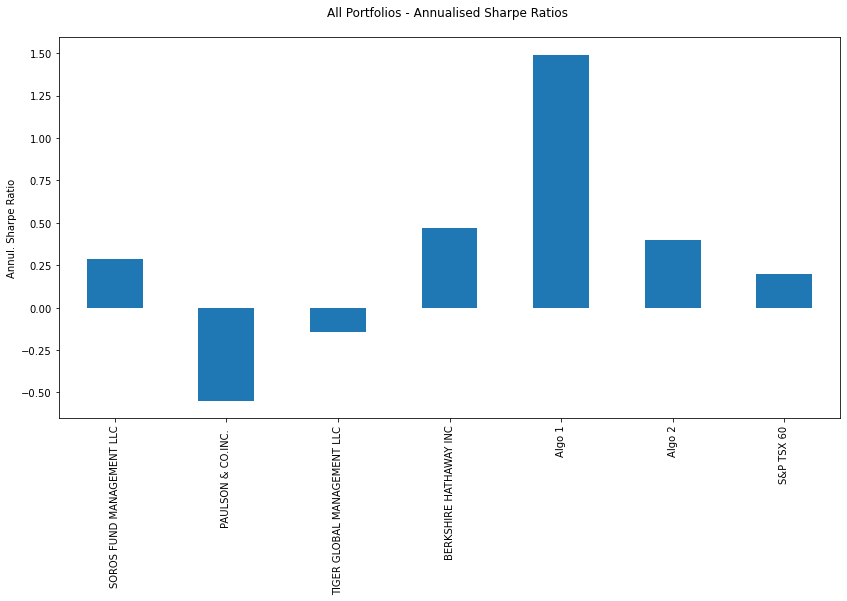

In [42]:
# Visualize the sharpe ratios as a bar plot
all_ret_sharpe.plot(kind="bar", figsize=(14,7), title="All Portfolios - Annualised Sharpe Ratios \n").set_ylabel("Annul. Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here! 
- Answer: -
  - The Algo portfolios have indeed ***collectively*** outperformed both the market (S&P TSX 60) and the Whale's portfolios.  Algo 1 has done particularly well in comparison to the rest.  Algo 2, however lags behind Berkshire (ever so slightly) which is the second-highest performing portfolio.  As mentioned though, together, the Algos have come out on top.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [43]:
# Reading data from 1st stock
shop_hist = pd.read_csv(Path("./Resources/shop_historical.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

# Extract the symbol for the column header, i.e. "SHOP"
shop_head = shop_hist["Symbol"].unique()

# Drop the "Symbol" column
shop_hist.drop(columns={'Symbol'}, inplace=True)

# Rename the "Close" column
shop_hist.rename(columns={'Close':shop_head[0]}, inplace=True)

# To be certain, sort the data in-place
shop_hist.sort_index(inplace=True)

# Confirm the data
shop_hist.tail()

,SHOP
Date,
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39
2019-12-27,534.76
2019-12-30,517.79


In [44]:
# Reading data from 2nd stock
otex_hist = pd.read_csv(Path("./Resources/otex_historical.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

# Extract column header for "OTEX"
otex_head = otex_hist["Symbol"].unique()

# Drop "Symbol"
otex_hist.drop(columns={'Symbol'}, inplace=True)

# Rename "Close"
otex_hist.rename(columns={'Close':otex_head[0]}, inplace=True)

# Sort the data
otex_hist.sort_index(inplace=True)
otex_hist.tail()

,OTEX
Date,
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44
2019-12-27,57.70
2019-12-30,57.19


In [45]:
# Reading data from 3rd stock
l_hist = pd.read_csv(Path("./Resources/l_historical.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

# Extract column header for "L"
l_head = l_hist["Symbol"].unique()

# Drop "Symbol" and rename "Close"
l_hist.drop(columns={'Symbol'}, inplace=True)
l_hist.rename(columns={'Close':l_head[0]}, inplace=True)

# Sort data
l_hist.sort_index(inplace=True)
l_hist.tail()

,L
Date,
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67
2019-12-27,67.78
2019-12-30,67.33


### My Portfolio - My Stock Selection
I've selected 2 of the largest S&P TSX 60 constituents by Index Weight to bolster the portfolio to a total of 5 stocks, which means they are all traded on the Toronto Stock Exchange. This allows for a more realistic comparison against each other and the referenced S&P TSX 60.
- They are: -
  - CNR: Canadian National Railway
  - BAM.A: Brookfield Asset Management

In [46]:
# Reading data from 4th stock - CNR
cnr_hist = pd.read_csv(Path("./Resources/cnr_historical.csv"))

# The "Date" column has time data that needs to be removed
# Extract date (not time) only and set the index in-place
cnr_hist.set_index(pd.DatetimeIndex(cnr_hist["Date"]).date, inplace=True)

# Drop the unwanted Date column
cnr_hist.drop(columns={'Date'},inplace=True)

# Rename the "Close" column
cnr_hist.rename(columns={'Close':'CNR'}, inplace=True)

# Sort data
cnr_hist.sort_index(inplace=True)
cnr_hist.tail()

,CNR
2021-05-28,136.00
2021-05-31,134.50
2021-06-01,135.40
2021-06-02,134.37
2021-06-03,135.07


In [47]:
# Reading data from 5th stock - BAM.A
bam_a_hist = pd.read_csv(Path("./Resources/bam.a_historical.csv")) #, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Extract date and set new index
bam_a_hist.set_index(pd.DatetimeIndex(bam_a_hist["Date"]).date, inplace=True)

# Drop unwanted "Date"
bam_a_hist.drop(columns={'Date'},inplace=True)

# Rename the "Close" column
bam_a_hist.rename(columns={'Close':'BAM.A'}, inplace=True)

# Sort data
bam_a_hist.sort_index(inplace=True)
bam_a_hist.tail()

,BAM.A
2021-05-28,60.79
2021-05-31,60.02
2021-06-01,60.56
2021-06-02,60.14
2021-06-03,60.51


In [48]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([shop_hist,otex_hist,l_hist,cnr_hist,bam_a_hist], axis='columns', join='inner')

# Sample to see how the join has gone
my_portfolio.sample(10)

,SHOP,OTEX,L,CNR,BAM.A
2018-02-16,172.60,44.08,55.70,95.64,33.73
2018-04-11,150.05,42.94,53.91,94.25,32.95
2018-03-21,193.00,46.09,55.73,94.98,34.37
2018-01-31,157.04,42.12,56.33,98.58,34.32
2018-02-05,149.12,44.98,54.84,96.67,32.33
2019-12-04,490.77,56.41,71.55,117.26,50.98
2019-07-16,415.60,55.52,66.86,124.57,42.45
2019-04-16,287.48,51.66,66.18,123.06,42.73
2019-05-01,331.00,51.67,64.34,123.78,42.91
2019-08-06,441.88,50.27,68.89,121.93,43.01


In [49]:
# Reset Date index
#
# I am not sure what is meant by this request.
# Joining the frames would not have been
# successful had I not cleaned them earlier.
# The main reason for that was the inclusion of time
# within the "Date" column.

In [50]:
# Reorganize portfolio data by having a column per symbol
#
# Please see sections above, where the data is read.
# I thought it neater and more efficient to resolve
# the column names in the source DataFrame.

In [51]:
# Calculate daily returns
my_pflo_ret = my_portfolio.pct_change().dropna()

# Drop NAs
# Done above at the creation of "my_pflo_ret"

# Display sample data
my_pflo_ret.sample(10)

,SHOP,OTEX,L,CNR,BAM.A
2018-05-04,0.008415,0.006925,0.001829,0.022042,0.008572
2018-04-13,-0.026188,-0.007148,-0.008523,-0.003401,-0.010834
2019-12-03,0.059540,-0.010092,0.002923,-0.021712,-0.005301
2019-12-19,-0.008645,-0.003826,-0.016284,-0.006131,0.010087
2019-06-05,0.066014,0.015271,0.012457,0.012465,0.008418
2018-04-09,0.009145,0.006418,0.021218,0.004444,0.003353
2019-10-03,0.051566,0.010997,0.004274,0.004513,-0.003088
2019-10-10,0.030073,-0.006669,-0.009710,0.008426,0.008701
2019-05-14,0.009148,0.002999,0.019472,0.007213,0.004705
2018-01-04,0.017092,-0.003715,0.000174,0.006499,0.007196


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
# As I added 2 more, I've altered the weightings from 1/3
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
my_pflo_wgt_ret = my_pflo_ret.dot(weights)

# Display sample data
my_pflo_wgt_ret.sample(10)

2019-04-17   -0.002975
2018-06-05    0.007866
2018-08-31   -0.005054
2019-06-24   -0.011868
2018-12-17   -0.027606
2019-12-12   -0.006660
2019-10-10    0.006164
2019-07-16   -0.002579
2019-12-09   -0.002836
2018-07-20   -0.007222
dtype: float64

Text(0, 0.5, 'CAD$\n')

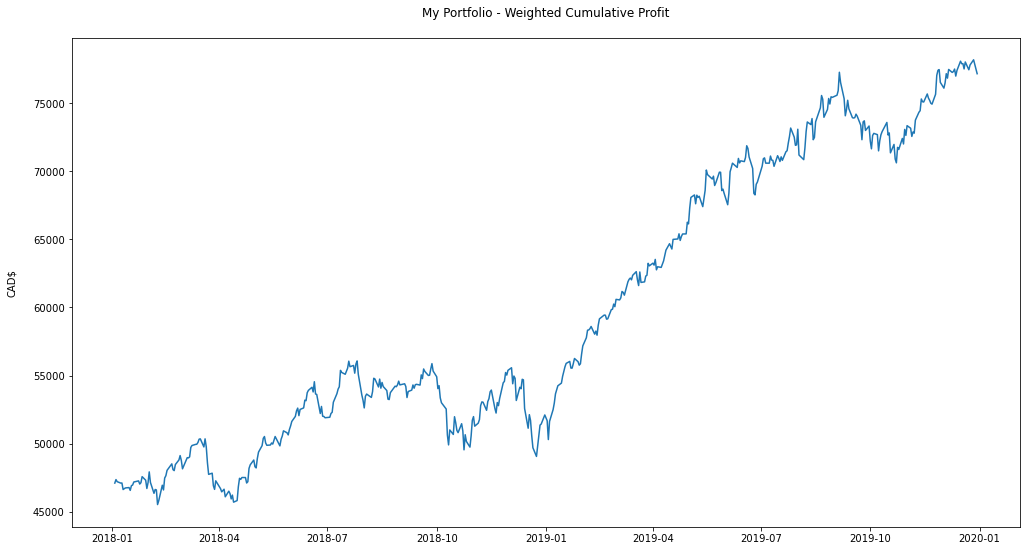

In [53]:
# !!!
#   Just for fun ...
#                   !!!
# Calculate cumulative returns and profit for my portfolio
my_pflo_wgt_ret_cum = (1 + my_pflo_wgt_ret).cumprod()

# Assuming starting capital of $47k
# Calculate cumulative profit
my_pflo_wgt_ret_pft = 47000 * my_pflo_wgt_ret_cum

# Plot Cumulative profit
my_pflo_wgt_ret_pft.plot(figsize=(17,9), title="My Portfolio - Weighted Cumulative Profit\n").set_ylabel("CAD$\n")

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
final_returns = pd.concat([all_returns,my_pflo_wgt_ret], axis='columns', join='outer')
final_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN


In [55]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# !!! Note !!!
# Performing an 'inner' join above would have
# resulted in the same DataFrame, but done quicker
final_returns.dropna(inplace=True)
final_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,0
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.002297
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.005449
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003225
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.002219
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.000138


In [56]:
# Rename the newly joined column
final_returns.rename(columns={0:'My Portfolio'}, inplace=True)
final_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.002297
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.005449
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003225
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.002219
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.000138


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [57]:
# Calculate the annualized `std`
final_returns.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
My Portfolio                   0.171891
dtype: float64

### Calculate and plot rolling `std` with 21-day window

Text(0, 0.5, 'Std. Dev.\n')

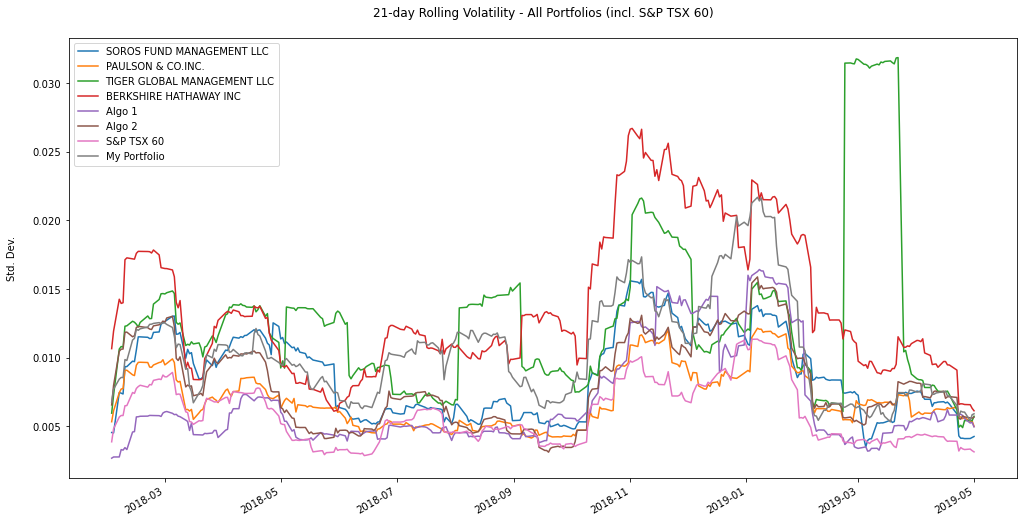

In [58]:
# Calculate rolling standard deviation
final_rets_roll21_std = final_returns.rolling(window=21).std()

# Plot rolling standard deviation
final_rets_roll21_std.plot(figsize=(17,9), \
                           title="21-day Rolling Volatility - All Portfolios (incl. S&P TSX 60)\n").set_ylabel("Std. Dev.\n")

### Calculate and plot the correlation

In [59]:
# Calculate and plot the correlation
# Eyeball the correlation ... no need to store it in a DataFrame
final_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.621795
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.448058
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.376420
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.687367
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.206913
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.636529
S&P TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.732147
My Portfolio,0.621795,0.448058,0.376420,0.687367,0.206913,0.636529,0.732147,1.000000


<AxesSubplot:>

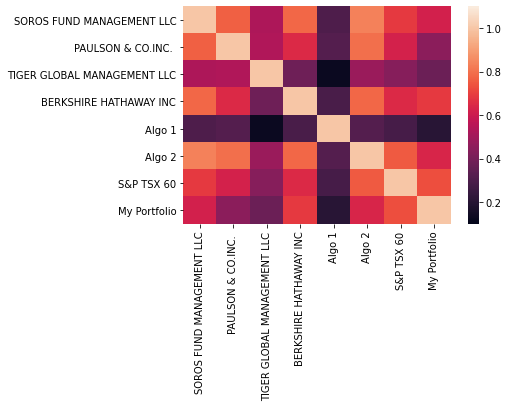

In [60]:
# Calculate and Plot a heatmap for better visual impact
sns.heatmap(final_returns.corr(), vmin=0.1, vmax=1.1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Text(0, 0.5, 'Beta\n')

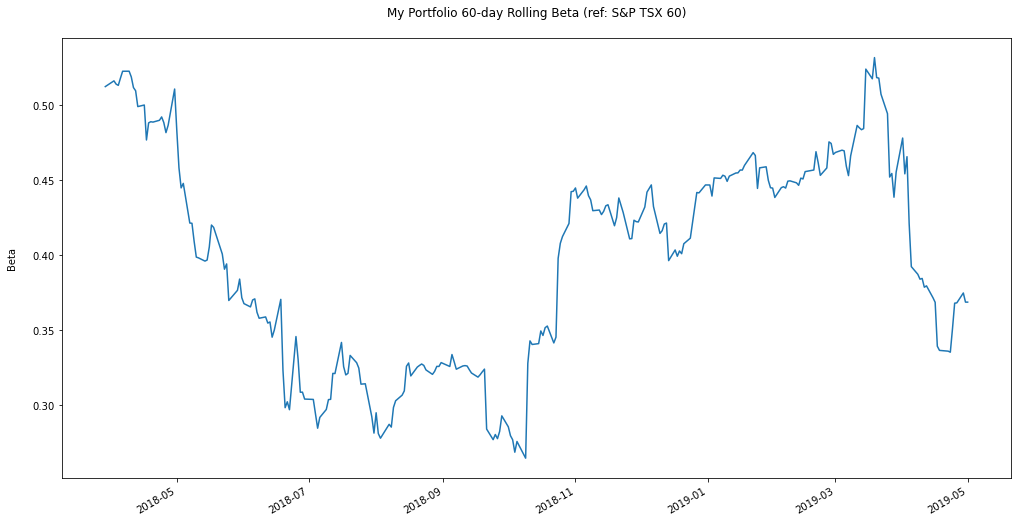

In [61]:
# Calculate and plot Beta
#
# My Portfolio against S&P TSX 60
# Rolling Covariance
fnl_ret_roll_cov = final_returns["My Portfolio"].rolling(window=60).cov(all_returns["S&P TSX 60"])

# Rolling Variance
fnl_ret_roll_var = final_returns["My Portfolio"].rolling(window=60).var()

# Rolling Beta
fnl_ret_roll_beta = fnl_ret_roll_cov / fnl_ret_roll_var

# Plot the Beta Trend
fnl_ret_roll_beta.plot(figsize=(17,9), \
                       title="My Portfolio 60-day Rolling Beta (ref: S&P TSX 60)\n").set_ylabel("Beta\n")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Calculate Annualzied Sharpe Ratios
# As before, assuming a risk-rate of 0
fnl_ret_sharpe = (final_returns.mean() * 252) / (final_returns.std() * np.sqrt(252))
fnl_ret_sharpe

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
My Portfolio                   1.560760
dtype: float64

Text(0, 0.5, 'Sharpe Ratio\n')

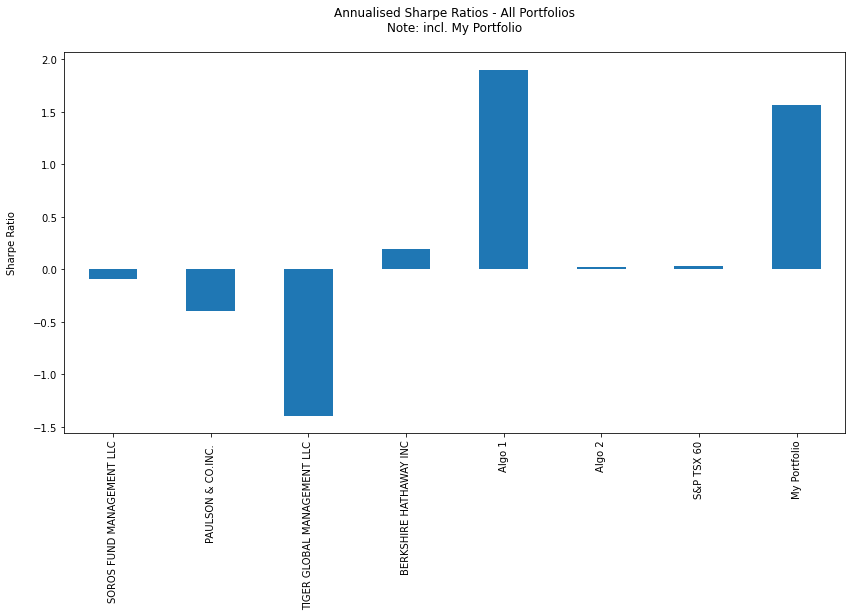

In [63]:
# Visualize the sharpe ratios as a bar plot
fnl_ret_sharpe.plot(kind="bar", \
                    figsize=(14,7), \
                    title="Annualised Sharpe Ratios - All Portfolios\nNote: incl. My Portfolio\n").set_ylabel("Sharpe Ratio\n")

### How does your portfolio do?

Write your answer here!
- Answer: -
  - My portfolio is doing fairly well!!  It has not done as well as the Algo 1 portfolio, which is the leading portfolio, but My Portfolio is the second most successful portfolio behind Algo 1.  Similarly, My Portfolio well outperformed the market. Analysing the underlying stocks, the extraordinary performance is due to the inclusion of Shopify (SHOP) in the portfolio. I know this because I did some additional analysis (but not shown within this notebook).
  - Another point of note, is that compared to the analysis done in the first half of this notebook, the range of dates is skewed to the most recent time period.  This is not a problem, when performing the analysis in isolation, but the addition of "My Portfolio" and performing an "inner" join, the bulk of the data for other portfolios was eliminated.
  - I understand (correct me if I'm wrong please) that the annualising of the data is all the more important for this type of analysis, because of the tendency for not all data to be available for all data points all the time.